In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [6]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [7]:
fold_ratio = 0.8 
data_train = int(mnist.data.shape[0] * fold_ratio)
print(data_train)

data_test = mnist.data.shape[0] - data_train 
print(data_test)

56000
14000


In [8]:
train_image = mnist.data[:data_train]
train_label = mnist.target[:data_train]

test_image = mnist.data[data_train:]
test_label = mnist.target[data_train:]

import numpy as np
shuffle_index = np.random.permutation(data_train)
train_image, train_label = mnist.data[shuffle_index], mnist.target[shuffle_index]

In [13]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
model = RandomForestClassifier()
model.fit(train_image, train_label)

prediction = model.predict(test_image)
result = (prediction == test_label).mean()
print(result)

df = pd.DataFrame([result], columns=['Accuracy'])
df.to_csv('E:\mnist_sklearn/acc.csv')

0.9717142857142858


['1' '5' '8' '7' '6' '1' '1' '8' '8' '2']


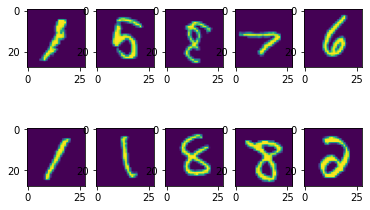

In [25]:
import matplotlib.pyplot as plt

random_pic = np.random.randint(low = 0, high = data_test, size = 10)

figure = plt.figure()

axis = []
for i in range(1, 11):
    axis.append(figure.add_subplot(2,5,i))
tmp_list = []
for i in range(10):
    tmp = mnist.data[data_train + random_pic[i]]
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)

print(test_label[random_pic])
    
for i in range(10):
    axis[i].imshow(tmp_list[i])
